In [21]:
import pandas as pd
import os
from aestheval.data.datasets import Reddit
import torch
from tqdm import tqdm

SPLITS = ('train', 'validation', 'test')
root_dataset = "/media/data-storage/datasets/reddit/" # Change this path to where the datasets has been downloaded
reddit_dataset = [Reddit(split, dataset_path=root_dataset, load_images=False, min_words=0, informativeness=True) for split in SPLITS]
dataset = torch.utils.data.ConcatDataset(reddit_dataset)


Using path:  /media/data-storage/datasets/reddit/processed_info_train.json
Using path:  /media/data-storage/datasets/reddit/processed_info_validation.json
Using path:  /media/data-storage/datasets/reddit/processed_info_test.json


In [47]:
from detoxify import Detoxify

detoxify = Detoxify('unbiased', device='cuda')

def extend_dictionary(dic1, dic2):

    assert set(dic1.keys()) == set(dic2.keys()), "Both dictionaries should have the same keys"
    for key in dic1:
        dic1[key].extend(dic2[key])


results = {
    'toxicity': [],
    'severe_toxicity': [],
    'obscene': [],
    'identity_attack': [],
    'insult': [],
    'threat': [],
    'sexual_explicit': [],
}
for img, metadata in tqdm(dataset):
    extend_dictionary(results, detoxify.predict(metadata['first_level_comments_values']))

100%|██████████| 70833/70833 [17:21<00:00, 67.99it/s]  


In [48]:
df = pd.DataFrame(results)
df.head()

,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit
0,0.000403,0.000001,0.000029,0.000079,0.000095,0.000018,0.000015
1,0.000584,0.000002,0.000035,0.000095,0.000159,0.000026,0.000019
2,0.138204,0.000049,0.000759,0.034167,0.009875,0.008937,0.000453
3,0.000430,0.000001,0.000028,0.000078,0.000113,0.000020,0.000014
4,0.001267,0.000003,0.000060,0.000134,0.000151,0.000272,0.000024


In [49]:
df.describe()

,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit
count,216519.000000,2.165190e+05,216519.000000,216519.000000,216519.000000,216519.000000,216519.000000
mean,0.028898,1.939355e-04,0.011257,0.003746,0.006726,0.004185,0.002597
std,0.122352,3.805400e-03,0.089595,0.033517,0.052519,0.033562,0.037684
min,0.000296,7.776556e-07,0.000014,0.000044,0.000061,0.000012,0.000006
25%,0.000480,1.478286e-06,0.000030,0.000080,0.000110,0.000023,0.000016
50%,0.000815,1.950958e-06,0.000048,0.000109,0.000155,0.000039,0.000024
75%,0.003655,5.699015e-06,0.000145,0.000310,0.000482,0.000144,0.000079
max,0.997912,4.756131e-01,0.993832,0.937725,0.993549,0.916739,0.985829


<AxesSubplot:ylabel='Frequency'>

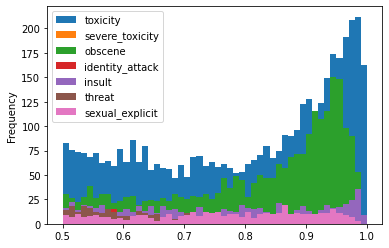

In [57]:
df.plot(kind='hist', range=(0.5,1.0), bins=50)

<AxesSubplot:ylabel='Frequency'>

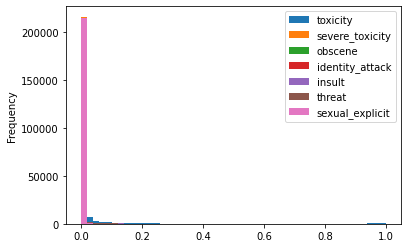

In [58]:
df.plot(kind='hist', bins=50)

In [64]:
for column in df.columns:
    print(column, df[df[column] > 0.5].shape[0])


toxicity 4369
severe_toxicity 0
obscene 2385
identity_attack 336
insult 742
threat 287
sexual_explicit 439


In [79]:
new_df =df.copy()
dfs= []
for column in new_df.columns:
    dfs.append(new_df[new_df[column] > 0.5].copy())

In [84]:
pd.concat(dfs).shape[0] / df.shape[0]

0.03952539961850923